Klasifikasi Hewan dengan Neural Network Juni 2021

Oleh:

FRANCISCO ALLENXEON C14190118

CHRISTIAN WILLSON C14190178

RICHARDO JASON C14190181

RICHSON SEDJIE C14190185

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.utils.vis_utils import plot_model

In [3]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [4]:
#Mount data
zoo = pd.read_csv('/content/gdrive/My Drive/Semester 4/KB/zoogabungan.csv')
print(zoo)

                   animal_name  hair  feathers  ...  domestic  catsize  class_type
0                     aardvark     1         0  ...         0        1           1
1                     antelope     1         0  ...         0        1           1
2                         bass     0         0  ...         0        0           4
3                         bear     1         0  ...         0        1           1
4                         boar     1         0  ...         0        1           1
..                         ...   ...       ...  ...       ...      ...         ...
209                      vespa     0         0  ...         0        0           6
210                  bicho-pau     0         0  ...         0        0           7
211  caracol-da-mata-atlantica     0         0  ...         0        0           7
212              caranguejeira     1         0  ...         0        0           7
213                sauva-limao     1         0  ...         0        0           7

[21

In [5]:
#Preprocessing Data
X = zoo.iloc[:, 1:-1]
Y = zoo.class_type.values

names = X.columns
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
print(scaled_df)

     hair  feathers  eggs  milk  airborne  ...  fins  legs  tail  domestic  catsize
0     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   0.0       0.0      1.0
1     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   1.0       0.0      1.0
2     0.0       0.0   1.0   0.0       0.0  ...   1.0  0.00   1.0       0.0      0.0
3     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   0.0       0.0      1.0
4     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   1.0       0.0      1.0
..    ...       ...   ...   ...       ...  ...   ...   ...   ...       ...      ...
209   0.0       0.0   1.0   0.0       1.0  ...   0.0  0.75   0.0       0.0      0.0
210   0.0       0.0   1.0   0.0       0.0  ...   0.0  0.75   0.0       0.0      0.0
211   0.0       0.0   1.0   0.0       0.0  ...   0.0  0.00   0.0       0.0      0.0
212   1.0       0.0   1.0   0.0       0.0  ...   0.0  1.00   0.0       0.0      0.0
213   1.0       0.0   1.0   0.0       0.0  ...   0.0  0.75   0.0       0.0  

In [17]:
#divide data to test and train

X = scaled_df
Y = zoo.class_type.values

#OneHotEncoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray()

X,Y

(     hair  feathers  eggs  milk  airborne  ...  fins  legs  tail  domestic  catsize
 0     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   0.0       0.0      1.0
 1     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   1.0       0.0      1.0
 2     0.0       0.0   1.0   0.0       0.0  ...   1.0  0.00   1.0       0.0      0.0
 3     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   0.0       0.0      1.0
 4     1.0       0.0   0.0   1.0       0.0  ...   0.0  0.50   1.0       0.0      1.0
 ..    ...       ...   ...   ...       ...  ...   ...   ...   ...       ...      ...
 209   0.0       0.0   1.0   0.0       1.0  ...   0.0  0.75   0.0       0.0      0.0
 210   0.0       0.0   1.0   0.0       0.0  ...   0.0  0.75   0.0       0.0      0.0
 211   0.0       0.0   1.0   0.0       0.0  ...   0.0  0.00   0.0       0.0      0.0
 212   1.0       0.0   1.0   0.0       0.0  ...   0.0  1.00   0.0       0.0      0.0
 213   1.0       0.0   1.0   0.0       0.0  ...   0.0  0.75   0.0

In [7]:
#Data Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

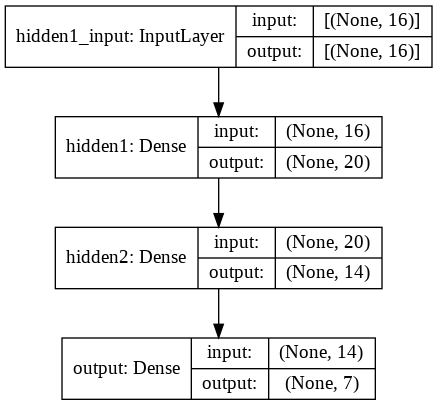

In [8]:
#make model

model = Sequential()

#hidden layer 1
model.add(Dense(units = 20, activation='relu', input_dim = 16, name='hidden1'))

#hidden layer 2
model.add(Dense(units = 14, activation = 'relu', name='hidden2'))

#output layer
model.add(Dense(units = 7, activation='sigmoid', name='output'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
#train data
model.fit(x_train, y_train, epochs=40, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 16s 37ms/step - loss: 2.0044 - accuracy: 0.0505 - val_loss: 1.9279 - val_accuracy: 0.0465
Epoch 2/40
18/18 [==============================] - 0s 3ms/step - loss: 1.9368 - accuracy: 0.0883 - val_loss: 1.8705 - val_accuracy: 0.0930
Epoch 3/40
18/18 [==============================] - 0s 4ms/step - loss: 1.8746 - accuracy: 0.1349 - val_loss: 1.8205 - val_accuracy: 0.1628
Epoch 4/40
18/18 [==============================] - 0s 3ms/step - loss: 1.8049 - accuracy: 0.2485 - val_loss: 1.7596 - val_accuracy: 0.3256
Epoch 5/40
18/18 [==============================] - 0s 3ms/step - loss: 1.7646 - accuracy: 0.4197 - val_loss: 1.6867 - val_accuracy: 0.5814
Epoch 6/40
18/18 [==============================] - 0s 4ms/step - loss: 1.6762 - accuracy: 0.6264 - val_loss: 1.5852 - val_accuracy: 0.6512
Epoch 7/40
18/18 [==============================] - 0s 4ms/step - loss: 1.5781 - accuracy: 0.6732 - val_loss: 1.4743 - val_accuracy: 0.6977
Epoch 8/40
18/18 [

In [10]:
#test data
print(model.evaluate(x_test, y_test)[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.1796 - accuracy: 0.9535
0.9534883499145508


In [11]:
#Predict Data
y_pred_cond = model.predict(x_test)
y_pred, y_correct = [],[]

for i in y_test:
  y_correct.append(np.argmax(i))
for j in y_pred_cond:
  y_pred.append(np.argmax(j))

pred_df = pd.DataFrame()
pred_df['Prediction'] = y_pred
pred_df['Correct'] = y_correct
pred_df

,Prediction,Correct
0,3,3
1,1,1
2,4,4
3,1,1
4,1,1
5,0,0
6,0,0
7,5,5
8,0,0
9,1,1


In [12]:
#Test User Input
test = pd.read_csv('/content/gdrive/My Drive/Semester 4/KB/testing1.csv')
A = test.iloc[:, 1:-1]
A

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
2,0,0,1,0,0,0,1,1,1,1,0,0,2,1,0,1
3,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [13]:
B = test.class_type.values - 1
print(B)

[0 5 2 0 0]


In [14]:
prediction = model.predict(A)
print(prediction)

[[9.7142947e-01 5.2497959e-05 7.8031039e-01 7.1218610e-04 3.0672640e-01
  2.1849659e-01 2.5413787e-01]
 [1.7240763e-02 2.9597668e-06 1.1870065e-01 5.6520402e-01 6.1821473e-01
  9.9896502e-01 9.9833202e-01]
 [3.2821786e-01 6.6683292e-03 9.6773684e-01 9.7016633e-02 8.0167246e-01
  5.1717466e-01 4.1226000e-02]
 [9.8866308e-01 8.9064240e-04 4.9577227e-01 1.0260046e-03 2.0421946e-01
  1.0465202e-01 3.4665525e-01]
 [9.6443307e-01 3.0888015e-05 6.0230452e-01 7.2252750e-04 1.8284479e-01
  3.7826699e-01 6.3222021e-01]]


In [15]:
B = test.class_type.values - 1
ombee = []

for j in prediction:
  ombee.append(np.argmax(j))

pred_df = pd.DataFrame()
pred_df['Prediction'] = ombee
pred_df['Correct'] = B
print(pred_df) 

for i in range (len(ombee)):
  if ombee[i] == 0:
      print('Mammalia')
  elif ombee[i] == 1:
      print('Bird')
  elif ombee[i] == 2:
      print('Reptile')
  elif ombee[i] == 3:
      print('Fish')
  elif ombee[i] == 4:
      print('Amphibian')
  elif ombee[i] == 5:
      print('Bug')
  elif ombee[i] == 6:
      print('Invertebrate')
  else:
      print('Cant recognize the animal')

print('done')

   Prediction  Correct
0           0        0
1           5        5
2           2        2
3           0        0
4           0        0
Mammalia
Bug
Reptile
Mammalia
Mammalia
done
